In [1]:
! pip install fastai
from fastai.vision.all import *

In [2]:
def book_plant_category(filename):
    return filename[0]

In [3]:
training_data = get_image_files("./train")

In [4]:
dls = ImageDataLoaders.from_name_func(
    ".", training_data, label_func=book_plant_category, seed=42, item_tfms=Resize(224), bs=2
)

In [5]:
learn = vision_learner(dls, squeezenet1_1, metrics=error_rate)

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [6]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.667934,0.003529,0.000000,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.686598,0.005289,0.000000,00:07


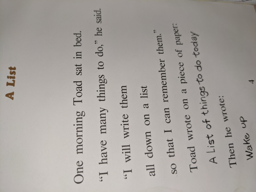

In [7]:
PILImage.create(Path("./a-list-page-1.png")).to_thumb(256)

In [8]:
learn.predict(PILImage.create(Path("./a-list-page-1.png")))

('b', TensorBase(0), TensorBase([0.9882, 0.0118]))

In [9]:
learn.predict(PILImage.create(Path("./plastic-lemons.png")))

('p', TensorBase(1), TensorBase([0.0844, 0.9156]))

In [10]:
learn.predict(PILImage.create(Path("./anise-hyssop-mugwort.png")))

('b', TensorBase(0), TensorBase([0.9660, 0.0340]))

In [11]:
learn.predict(PILImage.create(Path("./joaquin-miller-redwood-glen.png")))

('p', TensorBase(1), TensorBase([0.4766, 0.5234]))

In [12]:
learn.predict(PILImage.create(Path("./redwood-224x224.png")))

('p', TensorBase(1), TensorBase([0.3340, 0.6660]))

In [13]:
learn.save('squeezy')

Path('models/squeezy.pth')

In [14]:
pytorch_model = learn.model.eval()

In [15]:
import torchvision.transforms

In [16]:
softmax_layer = torch.nn.Softmax(dim=1)

In [17]:
normalization_layer = torchvision.transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])

In [18]:
final_model = nn.Sequential(normalization_layer, pytorch_model, softmax_layer)

In [32]:
torch.onnx.export(
    final_model, 
    torch.randn(1, 3, 224, 224).cuda(),
    'model.onnx',
    do_constant_folding=True,
    export_params=True,
    input_names=['input'],
    output_names=['output'],
    opset_version=13,
    dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
                 'output' : {0 : 'batch_size'}}
)


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


In [34]:
dls.vocab

['b', 'p']

In [37]:
list(dls.vocab)

['b', 'p']

In [38]:
import json
with open("vocab.json", "w") as f: f.write(json.dumps(list(dls.vocab)))